In [1]:
from mygraph import *
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [2]:
DIRECTED = False
COLOR = "r"
WIDTH = 4

In [3]:
graph = WeightedGraph()
graph.read_from_file("input.txt", DIRECTED)
graph.print()

7: 5(1) 6(2) 4(5) 5(1) 
6: 3(2) 4(4) 5(3) 7(2) 
5: 2(5) 6(3) 7(1) 4(2) 7(1) 
4: 1(1) 6(4) 5(2) 7(5) 
3: 1(3) 6(2) 
2: 0(1) 5(5) 
1: 0(2) 3(3) 4(1) 
0: 1(2) 2(1) 


In [4]:
G = nx.read_weighted_edgelist("input2.txt", create_using = nx.Graph)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
labels = nx.get_edge_attributes(G,'weight')

In [5]:
def visualize_path(path: list, G = G, pos = pos, color = COLOR, width = WIDTH, show_weights = False):
    path = list(map(str, path))
    path_edges = list(zip(path, path[1:]))
    
    nx.draw_networkx(G, pos)
    nx.draw_networkx_nodes(G, pos,nodelist=path,node_color=COLOR)
    nx.draw_networkx_edges(G, pos,edgelist=path_edges,edge_color=COLOR,width=WIDTH)
    if show_weights:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    # plt.axis('equal')
    plt.show()

In [6]:
G.adj

AdjacencyView({'0': {'1': {'weight': 2.0}, '2': {'weight': 1.0}}, '1': {'0': {'weight': 2.0}, '3': {'weight': 3.0}, '4': {'weight': 1.0}}, '2': {'0': {'weight': 1.0}, '5': {'weight': 5.0}}, '3': {'1': {'weight': 3.0}, '6': {'weight': 2.0}}, '4': {'1': {'weight': 1.0}, '6': {'weight': 4.0}, '5': {'weight': 2.0}, '7': {'weight': 5.0}}, '5': {'2': {'weight': 5.0}, '6': {'weight': 3.0}, '7': {'weight': 1.0}, '4': {'weight': 2.0}}, '6': {'3': {'weight': 2.0}, '4': {'weight': 4.0}, '5': {'weight': 3.0}, '7': {'weight': 2.0}}, '7': {'5': {'weight': 1.0}, '6': {'weight': 2.0}, '4': {'weight': 5.0}}})

In [7]:
bfs_path = list(map(str, graph.bfs(3)))
path_edges = [(x,str(i)) for i, x in enumerate(prims_path) if x != -1][1:]
print(path_edges) 
nx.draw_networkx(G, pos)
nx.draw_networkx_edges(G, pos,edgelist=path_edges,edge_color=COLOR,width=WIDTH)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

# plt.axis('equal')
plt.show()

TypeError: Graph.has_edge() missing 1 required positional argument: 'v'

1 4 7 5 6 3 2 0 


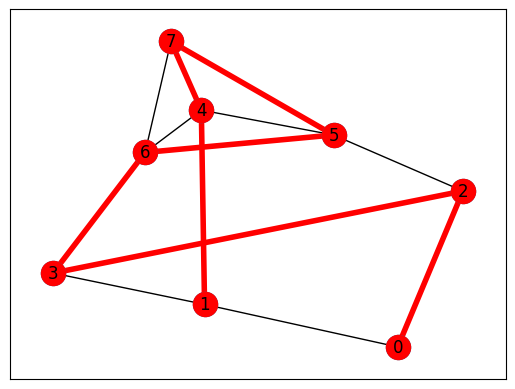

In [8]:
dfs_path = graph.dfs(1)
visualize_path(dfs_path)

[('0', '1'), ('0', '2'), ('6', '3'), ('1', '4'), ('4', '5'), ('7', '6'), ('5', '7')]
0 -> 1
0 -> 2
6 -> 3
1 -> 4
4 -> 5
7 -> 6
5 -> 7


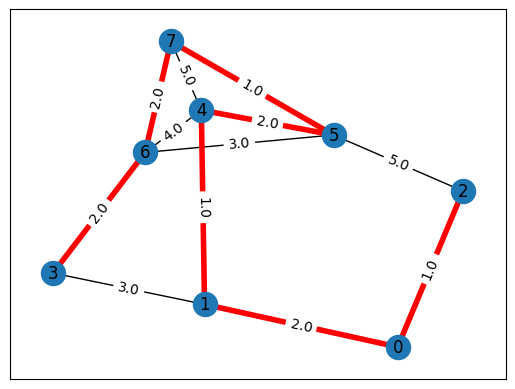

In [9]:
prims_path = list(map(str, graph.prims()))
path_edges = [(x,str(i)) for i, x in enumerate(prims_path)][1:]
print(path_edges) 
nx.draw_networkx(G, pos)
nx.draw_networkx_edges(G, pos,edgelist=path_edges,edge_color=COLOR,width=WIDTH)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

# plt.axis('equal')
plt.show()

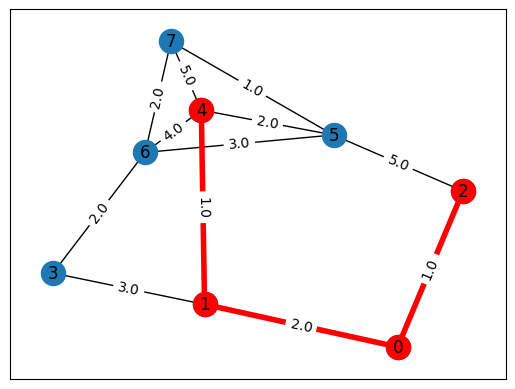

In [10]:
dij_path = graph.dijkstra_shortest_path(2)
visualize_path(dij_path[4], show_weights=True)

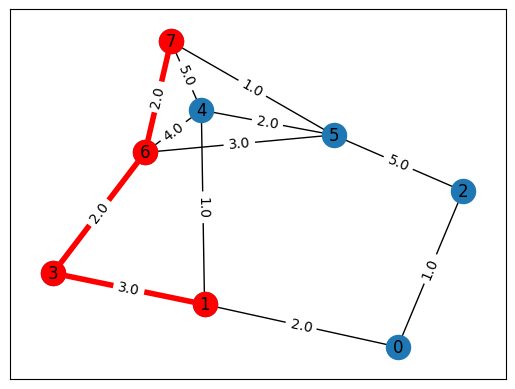

In [11]:
distances = {0:9,
    1: 7,
    2: 6,
    3: 5,
    4: 7,
    5: 3,
    6: 2,
    7: 0}
a_star_path = graph.a_star_search(1, 7, distances)
visualize_path(a_star_path, show_weights = True)
